# <center> Airline Reviews

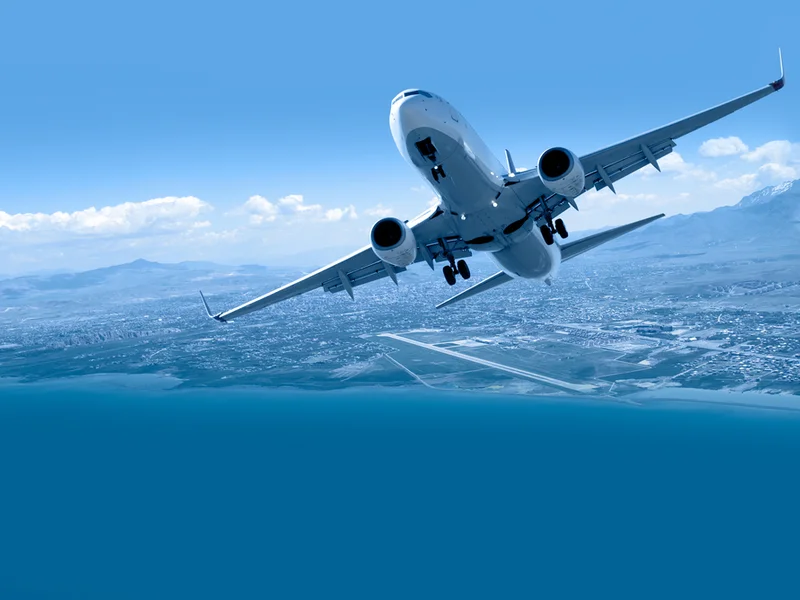

#### Loading the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [2]:
df=pd.read_csv('./archive (5).zip',parse_dates=['DateFlown'])
df.head()

,Aircraft,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,...,Route,SeatComfortRating,ServiceRating,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id
0,NaN,AB Aviation,Economy Class,2019-11-01,11th November 2019,0,4,4,Netherlands,9.0,...,Moroni to Moheli,4,5,ab-aviation,pretty decent airline,Solo Leisure,Trip Verified,3,0,d3b260fb-268b-4399-8a9b-2804825902c6
1,E120,AB Aviation,Economy Class,2019-06-01,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Moroni to Anjouan,2,2,ab-aviation,Not a good airline,Solo Leisure,Trip Verified,2,0,307711df-268f-4698-97b8-45729b7d972e
2,Embraer E120,AB Aviation,Economy Class,2019-06-01,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Anjouan to Dzaoudzi,2,1,ab-aviation,flight was fortunately short,Solo Leisure,Trip Verified,2,0,82bd2602-171d-4724-bde0-90b71621cdcf
3,NaN,Aerocaribbean,Economy Class,NaT,31st December 2010,0,0,0,Denmark,8.0,...,NaN,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,4,0,a927beb4-6244-4f5c-9dc3-09890aa3e616
4,NaN,Aerocaribbean,NaN,NaT,25th November 2010,0,0,0,UnitedKingdom,1.0,...,NaN,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,0,0,d7bea425-c58a-4a7e-8269-02e0e6516633


In [3]:
df.head(3)

,Aircraft,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,...,Route,SeatComfortRating,ServiceRating,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id
0,NaN,AB Aviation,Economy Class,2019-11-01,11th November 2019,0,4,4,Netherlands,9.0,...,Moroni to Moheli,4,5,ab-aviation,pretty decent airline,Solo Leisure,Trip Verified,3,0,d3b260fb-268b-4399-8a9b-2804825902c6
1,E120,AB Aviation,Economy Class,2019-06-01,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Moroni to Anjouan,2,2,ab-aviation,Not a good airline,Solo Leisure,Trip Verified,2,0,307711df-268f-4698-97b8-45729b7d972e
2,Embraer E120,AB Aviation,Economy Class,2019-06-01,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Anjouan to Dzaoudzi,2,1,ab-aviation,flight was fortunately short,Solo Leisure,Trip Verified,2,0,82bd2602-171d-4724-bde0-90b71621cdcf


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129455 entries, 0 to 129454
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Aircraft             36424 non-null   object        
 1   AirlineName          129455 non-null  object        
 2   CabinType            126437 non-null  object        
 3   DateFlown            90993 non-null   datetime64[ns]
 4   DatePub              129455 non-null  object        
 5   EntertainmentRating  129455 non-null  int64         
 6   FoodRating           129455 non-null  int64         
 7   GroundServiceRating  129455 non-null  int64         
 8   OriginCountry        127777 non-null  object        
 9   OverallScore         125124 non-null  float64       
 10  Recommended          129455 non-null  object        
 11  Review               128631 non-null  object        
 12  Route                90825 non-null   object        
 13  SeatComfortRat

In [5]:
df.describe()

,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,SeatComfortRating,ServiceRating,ValueRating,WifiRating
count,129455.000000,129455.000000,129455.000000,125124.000000,129455.000000,129455.000000,129455.000000,129455.000000
mean,1.557190,1.989077,1.652010,4.556408,2.470202,2.689622,2.637527,0.453926
std,1.751076,1.774512,1.740252,3.498833,1.620262,1.774499,1.628808,1.078274
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,3.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,4.000000,3.000000,8.000000,4.000000,4.000000,4.000000,0.000000
max,5.000000,5.000000,5.000000,10.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
df.shape

(129455, 22)

In [7]:
df.isnull().mean()*100

Aircraft               71.863582
AirlineName             0.000000
CabinType               2.331312
DateFlown              29.710710
DatePub                 0.000000
EntertainmentRating     0.000000
FoodRating              0.000000
GroundServiceRating     0.000000
OriginCountry           1.296203
OverallScore            3.345564
Recommended             0.000000
Review                  0.636515
Route                  29.840485
SeatComfortRating       0.000000
ServiceRating           0.000000
Slug                    0.000000
Title                   0.003090
TravelType             29.592522
TripVerified           54.031903
ValueRating             0.000000
WifiRating              0.000000
unique_id               0.000000
dtype: float64

In [8]:
df.dropna(inplace=True)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
to_drop = ['Review', 'Slug', 'unique_id','ValueRating','Title','DatePub']

In [11]:
df.drop(columns=to_drop, inplace=True)
df

,Aircraft,AirlineName,CabinType,DateFlown,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,Route,SeatComfortRating,ServiceRating,TravelType,TripVerified,WifiRating
1,E120,AB Aviation,Economy Class,2019-06-01,0,1,1,UnitedKingdom,1.0,no,Moroni to Anjouan,2,2,Solo Leisure,Trip Verified,0
2,Embraer E120,AB Aviation,Economy Class,2019-06-01,0,1,1,UnitedKingdom,1.0,no,Anjouan to Dzaoudzi,2,1,Solo Leisure,Trip Verified,0
7,Dornier,Aero VIP,Economy Class,2019-04-01,0,0,5,Portugal,9.0,yes,Cascais to Bragança,4,4,Solo Leisure,Trip Verified,0
8,Dornier,Aero VIP,Economy Class,2019-04-01,0,0,5,Portugal,9.0,yes,Bragança to Cascais,4,5,Solo Leisure,Trip Verified,0
12,CR 900,Adria Airways,Economy Class,2019-09-01,1,1,1,Austria,1.0,no,Sarajevo to Ljubljana,1,1,Couple Leisure,Trip Verified,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128932,A321,Wizz Air,Economy Class,2018-01-01,0,0,2,Belarus,5.0,no,Vilnius to Rome,2,5,Solo Leisure,Trip Verified,0
128935,A320,Wizz Air,Economy Class,2017-08-01,0,4,4,Bulgaria,8.0,yes,Geneva to Sofia,4,4,Solo Leisure,Trip Verified,0
128942,A321-200,Wizz Air,Economy Class,2017-10-01,0,2,5,Hungary,7.0,yes,Budapest to London,2,5,Solo Leisure,Trip Verified,0
128944,Airbus,Wizz Air,Economy Class,2017-12-01,1,0,1,Romania,1.0,no,Milan to Bucharest,2,1,Couple Leisure,Trip Verified,0


In [12]:
df.sort_values(by='DateFlown',inplace=True)

In [13]:
df.reset_index(drop=True,inplace=True)

### Univariate analysis

#### Histograms

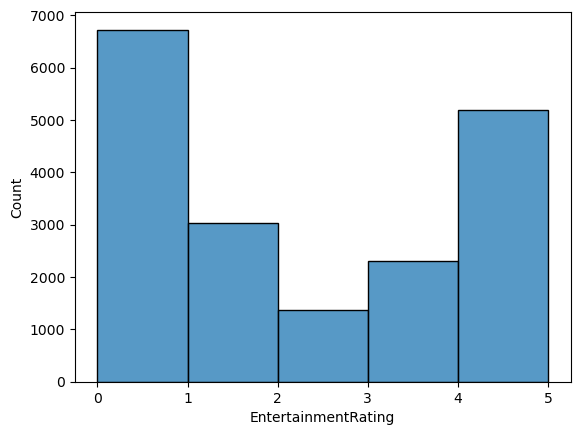

In [14]:
sns.histplot(data=df,x='EntertainmentRating',bins=5);

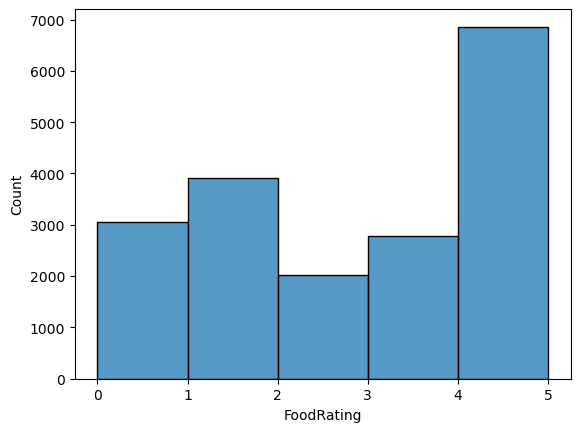

In [15]:
sns.histplot(data=df,x='FoodRating',bins=5)
plt.show()

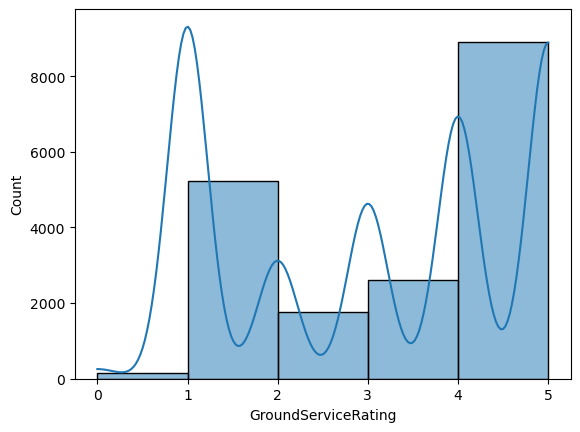

In [16]:
sns.histplot(data=df,x='GroundServiceRating',kde=True,bins=5)
plt.show()

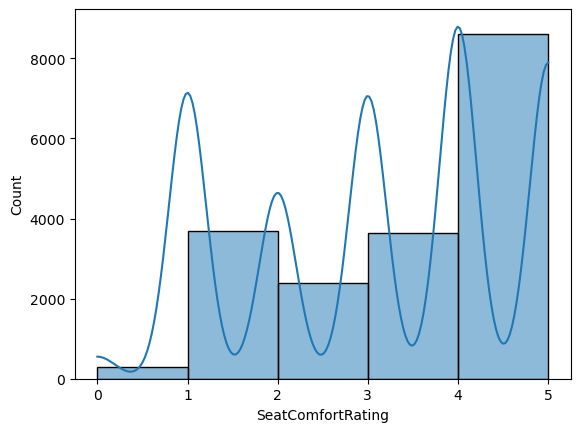

In [17]:
sns.histplot(data=df,x='SeatComfortRating',kde=True,bins=5);

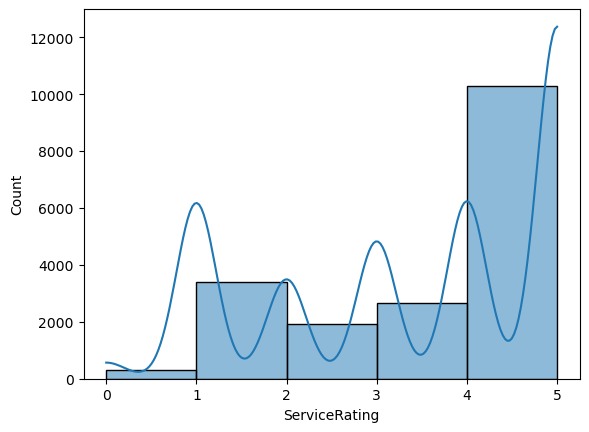

In [18]:
sns.histplot(data=df,x='ServiceRating',kde=True,bins=5)
plt.show()

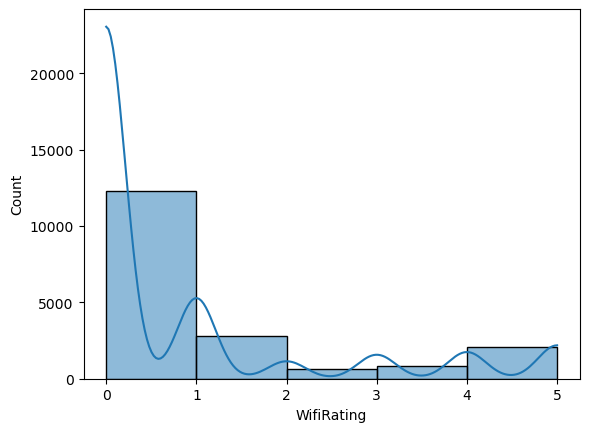

In [19]:
sns.histplot(data=df,x='WifiRating',bins=5,kde=True)
plt.show()

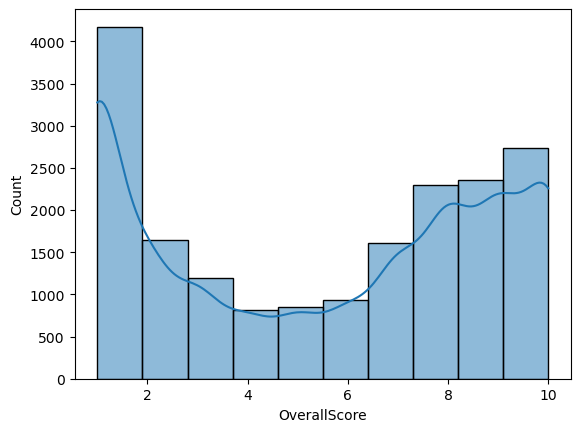

In [20]:
sns.histplot(data=df,x='OverallScore',kde=True,bins=10)
plt.show()

#### Count plot

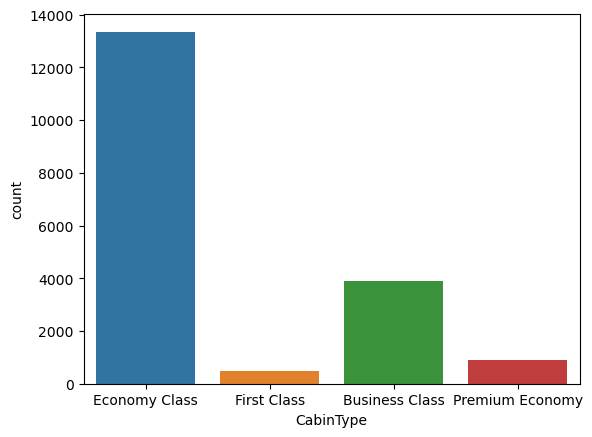

In [21]:
sns.countplot(x='CabinType',data=df)
plt.show()

In [22]:
df.columns

Index(['Aircraft', 'AirlineName', 'CabinType', 'DateFlown',
       'EntertainmentRating', 'FoodRating', 'GroundServiceRating',
       'OriginCountry', 'OverallScore', 'Recommended', 'Route',
       'SeatComfortRating', 'ServiceRating', 'TravelType', 'TripVerified',
       'WifiRating'],
      dtype='object')

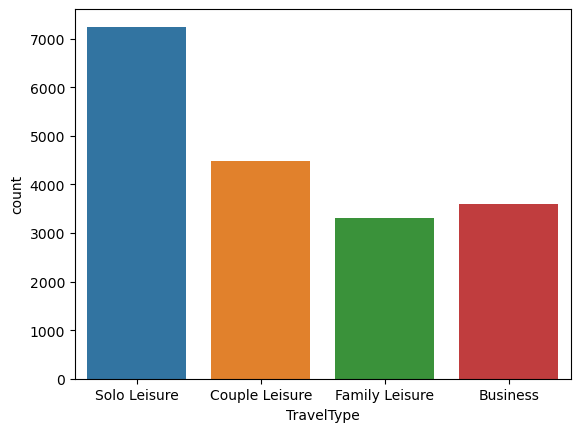

In [23]:
sns.countplot(x='TravelType',data=df)
plt.show()

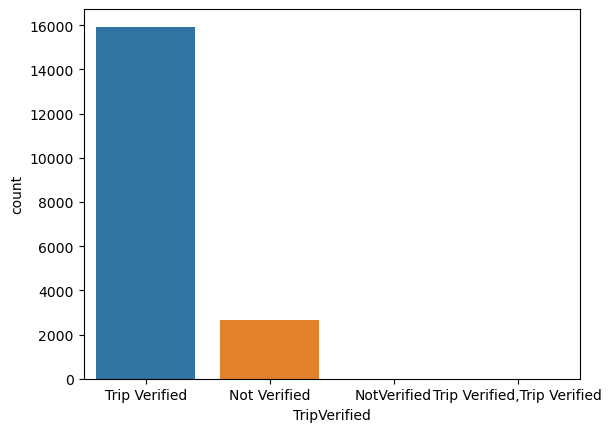

In [24]:
sns.countplot(x='TripVerified',data=df)
plt.show()

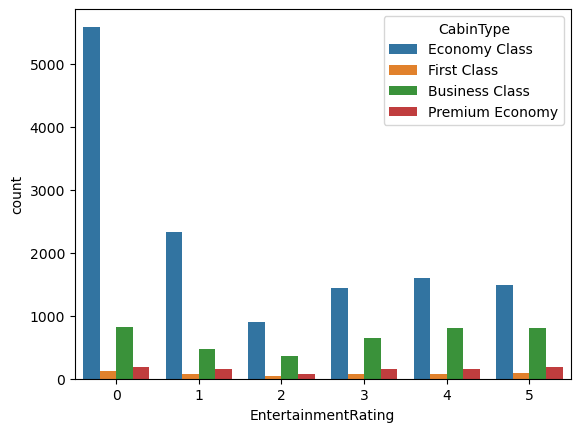

In [25]:
sns.countplot(x='EntertainmentRating',hue='CabinType',data=df);

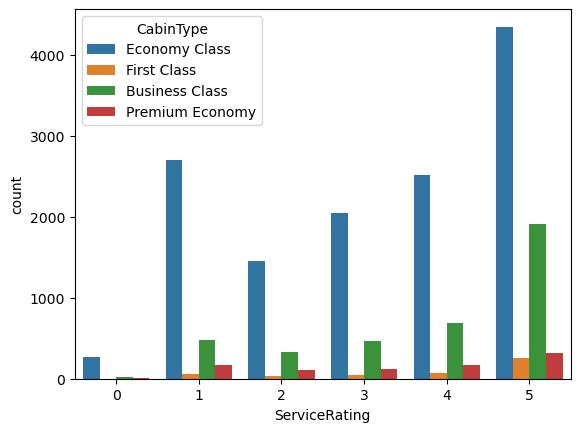

In [26]:
sns.countplot(x='ServiceRating',hue='CabinType',data=df);

### Bar plot

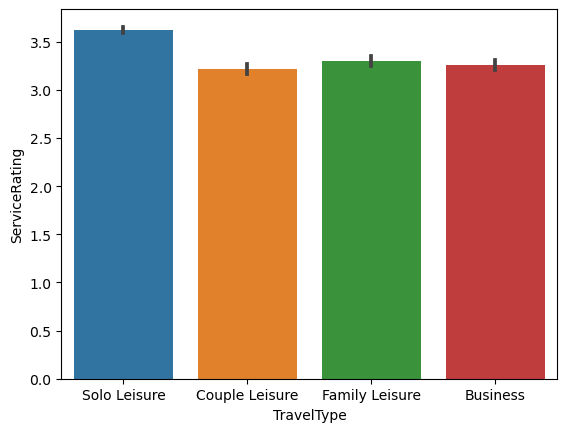

In [27]:
sns.barplot(data=df,x='TravelType',y='ServiceRating');

#### Box plot

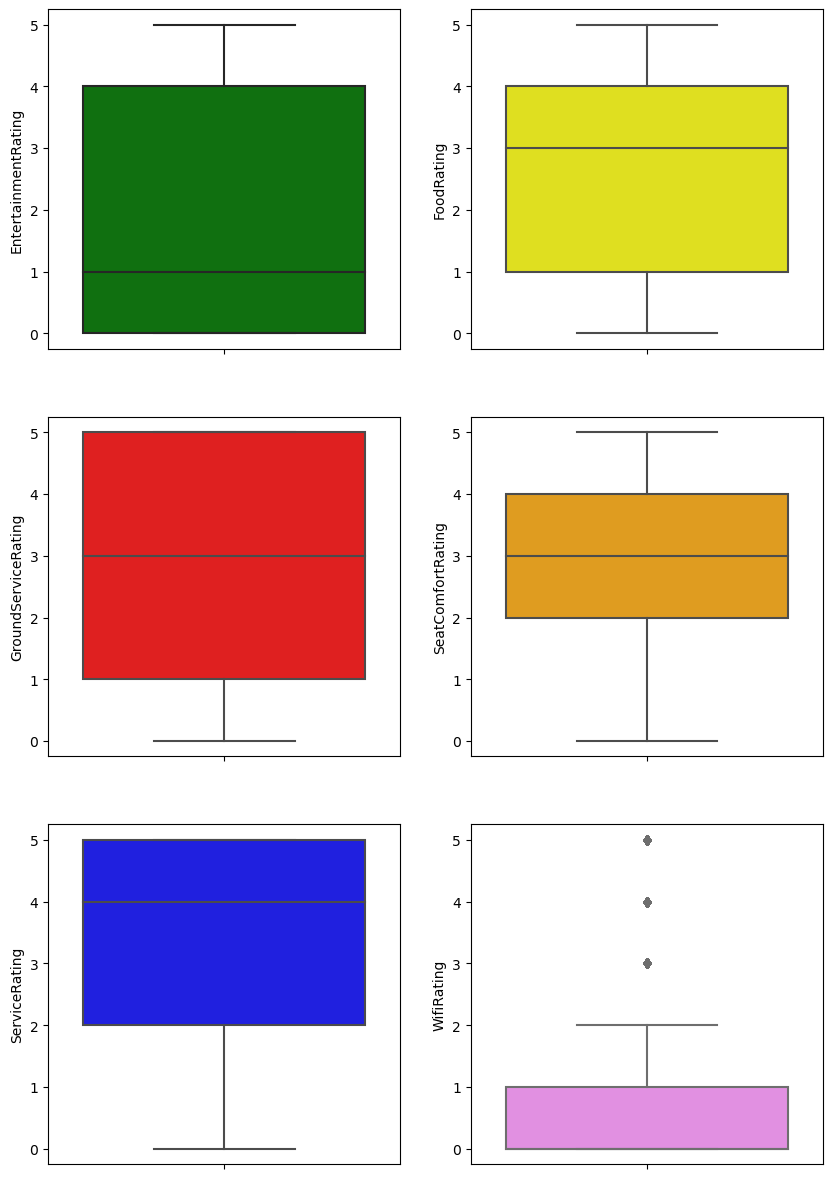

In [28]:
plt.figure(figsize=(10,15))
plt.subplot(3,2,1)
sns.boxplot(data=df,y='EntertainmentRating',color='green')
plt.subplot(3,2,2)
sns.boxplot(data=df,y='FoodRating',color='yellow')
plt.subplot(3,2,3)
sns.boxplot(data=df,y='GroundServiceRating',color='red')
plt.subplot(3,2,4)
sns.boxplot(data=df,y='SeatComfortRating',color='orange')
plt.subplot(3,2,5)
sns.boxplot(data=df,y='ServiceRating',color='blue')
plt.subplot(3,2,6)
sns.boxplot(data=df,y='WifiRating',color='violet')
plt.show()


In [29]:
df.columns

Index(['Aircraft', 'AirlineName', 'CabinType', 'DateFlown',
       'EntertainmentRating', 'FoodRating', 'GroundServiceRating',
       'OriginCountry', 'OverallScore', 'Recommended', 'Route',
       'SeatComfortRating', 'ServiceRating', 'TravelType', 'TripVerified',
       'WifiRating'],
      dtype='object')

In [30]:
df['Year']=df.DateFlown.dt.year

In [31]:
df

,Aircraft,AirlineName,CabinType,DateFlown,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,Route,SeatComfortRating,ServiceRating,TravelType,TripVerified,WifiRating,Year
0,A320 / B777-300,Etihad Airways,Economy Class,2016-06-01,3,3,3,Malawi,7.0,yes,Nairobi to Manchester via Abu Dhabi,3,4,Solo Leisure,Trip Verified,0,2016
1,A330,Iberia,Economy Class,2016-09-01,5,5,3,Greece,8.0,yes,Madrid to Miami,4,5,Couple Leisure,Trip Verified,0,2016
2,A330-300,SriLankan Airlines,Economy Class,2016-10-01,0,4,4,Germany,9.0,yes,Frankfurt to Colombo,5,5,Family Leisure,Trip Verified,0,2016
3,A320,Austrian Airlines,Economy Class,2016-12-01,0,3,4,Austria,3.0,no,Vienna to Paris CDG,4,3,Couple Leisure,Trip Verified,0,2016
4,A321 / MD80,American Airlines,Economy Class,2017-01-01,0,3,4,Austria,9.0,yes,Las Vegas to Corpus Christi via Dallas,5,5,Solo Leisure,Trip Verified,0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18615,Boeing 737-800,United Airlines,Premium Economy,2023-05-01,1,1,1,UnitedStates,1.0,no,Baltimore to Los Angeles,1,1,Couple Leisure,Not Verified,0,2023
18616,A320,United Airlines,First Class,2023-05-01,2,1,1,UnitedStates,2.0,no,Duluth to Jacksonville via Chicago,3,1,Business,Trip Verified,2,2023
18617,Boeing 747,United Airlines,Economy Class,2023-05-01,2,1,1,UnitedStates,2.0,no,Wichita to Miami,1,4,Couple Leisure,Not Verified,1,2023
18618,A330-300 and Boeing 777-200ER,Thai Airways,Economy Class,2023-05-01,4,4,4,Indonesia,9.0,yes,Tokyo Haneda to Jakarta via Bangkok,4,4,Family Leisure,Trip Verified,0,2023


### Line charts

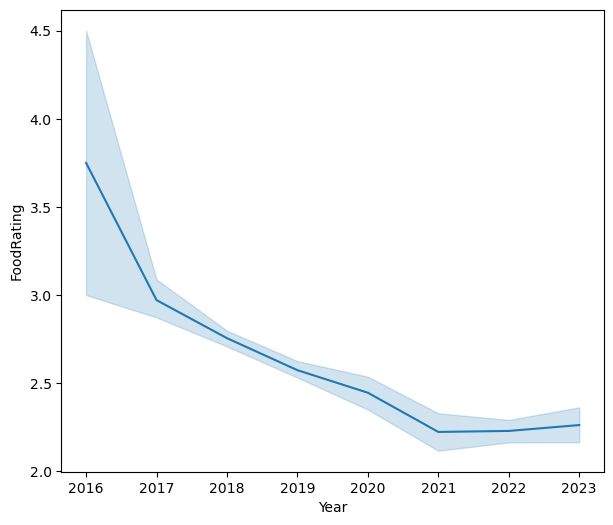

In [32]:
plt.figure(figsize=(7,6))
plt.xlabel('Year')
plt.ylabel('FoodRating')
sns.lineplot(data=df,x='Year',y='FoodRating');

In [33]:
df.columns

Index(['Aircraft', 'AirlineName', 'CabinType', 'DateFlown',
       'EntertainmentRating', 'FoodRating', 'GroundServiceRating',
       'OriginCountry', 'OverallScore', 'Recommended', 'Route',
       'SeatComfortRating', 'ServiceRating', 'TravelType', 'TripVerified',
       'WifiRating', 'Year'],
      dtype='object')

In [34]:
df.CabinType.unique()

array(['Economy Class', 'First Class', 'Business Class',
       'Premium Economy'], dtype=object)

### pie chart

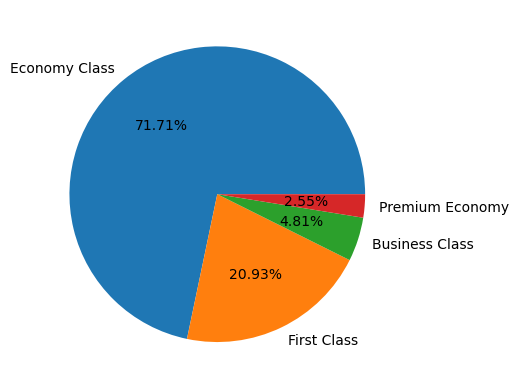

In [35]:
plt.pie(data=df,\
       x=df.CabinType.value_counts(),\
        labels=['Economy Class', 'First Class', 'Business Class', 'Premium Economy'],\
        autopct='%0.2f%%');

In [36]:
popular_airline=pd.crosstab(df.AirlineName,df.CabinType)
popular_airline

CabinType,Business Class,Economy Class,First Class,Premium Economy
AirlineName,,,,
AB Aviation,0,2,0,0
ANA All Nippon Airways,19,53,4,12
ASKY Airlines,1,0,0,0
Adria Airways,0,5,0,0
Aegean Airlines,24,142,0,0
...,...,...,...,...
euroAtlantic Airways,0,6,0,0
fastjet,0,4,0,0
flyadeal,0,8,0,0


In [37]:
popular_airline.nlargest(5,'Business Class')

CabinType,Business Class,Economy Class,First Class,Premium Economy
AirlineName,,,,
Qatar Airways,294,329,10,4
British Airways,288,318,47,67
Lufthansa,181,304,14,33
Emirates,159,354,17,5
Turkish Airlines,145,273,0,2


In [38]:
df.Recommended.replace({'yes':1,'no':0},inplace=True)


In [39]:
airline_recommended=df.groupby(['AirlineName'])['Recommended'].sum()

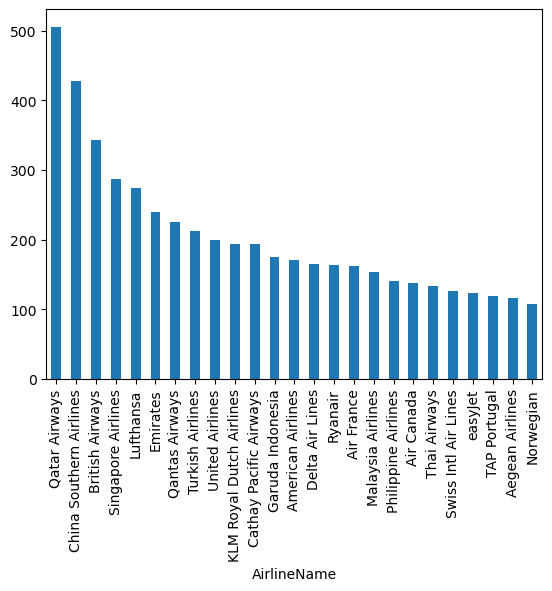

In [40]:
airline_recommended.nlargest(25).plot.bar();

#### Heat map                                                                                                                              

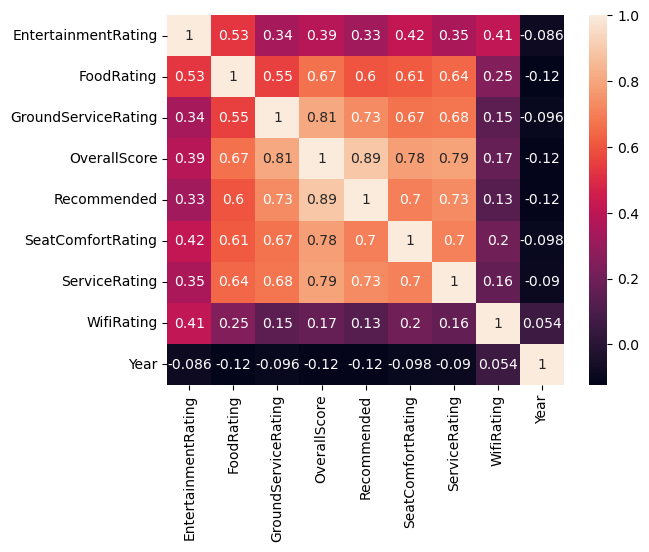

In [41]:
sns.heatmap(df.corr(),annot=True);

In [42]:
Economy_solo=df.query("CabinType=='Economy Class'& TravelType=='Solo Leisure'")
Economy_solo

,Aircraft,AirlineName,CabinType,DateFlown,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,Route,SeatComfortRating,ServiceRating,TravelType,TripVerified,WifiRating,Year
0,A320 / B777-300,Etihad Airways,Economy Class,2016-06-01,3,3,3,Malawi,7.0,1,Nairobi to Manchester via Abu Dhabi,3,4,Solo Leisure,Trip Verified,0,2016
4,A321 / MD80,American Airlines,Economy Class,2017-01-01,0,3,4,Austria,9.0,1,Las Vegas to Corpus Christi via Dallas,5,5,Solo Leisure,Trip Verified,0,2017
8,Boeing 777,Qatar Airways,Economy Class,2017-01-01,2,4,2,UnitedStates,8.0,1,Dallas to Colombo via Doha,3,5,Solo Leisure,Trip Verified,0,2017
12,Boeing / 777 300 / 747 8i / A330-300,Korean Air,Economy Class,2017-03-01,4,5,4,Malaysia,8.0,1,Kuala Lumpur to Ulaanbaatar via Seoul,4,5,Solo Leisure,Trip Verified,0,2017
13,A330-200/A320,China Eastern Airlines,Economy Class,2017-03-01,3,4,1,Germany,7.0,1,Paris to Shenzhen via Shanghai Pudong,4,3,Solo Leisure,Trip Verified,0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18600,Boeing 777 / A320,Swiss Intl Air Lines,Economy Class,2023-05-01,2,2,1,UnitedKingdom,3.0,0,Bangkok to London via Zurich,3,2,Solo Leisure,Not Verified,0,2023
18605,Boeing 737,Flair Airlines,Economy Class,2023-05-01,0,0,1,Canada,1.0,0,Calgary to Victoria,2,2,Solo Leisure,Not Verified,0,2023
18606,737,Flair Airlines,Economy Class,2023-05-01,0,1,1,Canada,1.0,0,Vancouver to Waterloo,1,1,Solo Leisure,Trip Verified,0,2023
18611,A320,Iberia Express,Economy Class,2023-05-01,1,1,1,Spain,1.0,0,Paris to Spain,1,2,Solo Leisure,Not Verified,1,2023


### Regplot

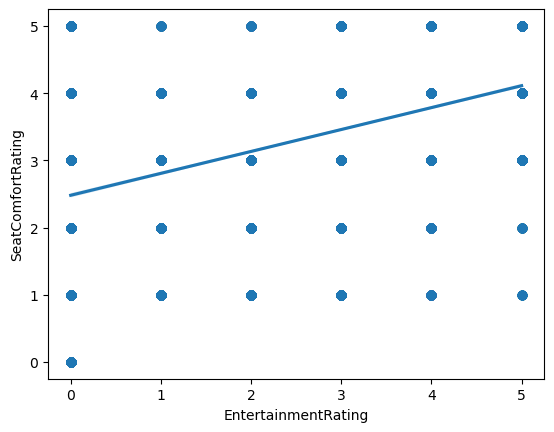

In [43]:
sns.regplot(data=df,x='EntertainmentRating',y='SeatComfortRating');